# import library

In [507]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [508]:
data = pd.read_csv("bank.csv" , delimiter=";")
data.shape

(4521, 17)

# load data

In [509]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# exploratory data analysis (EDA) 

In [510]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


# age

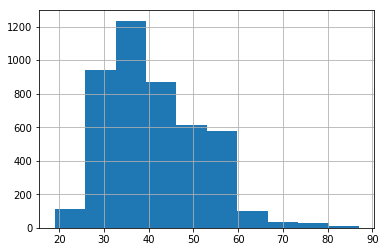

In [511]:
data.age.hist()

- most clients have an age range between (25,60)
- bank only intersted in the working class ? 

# Job

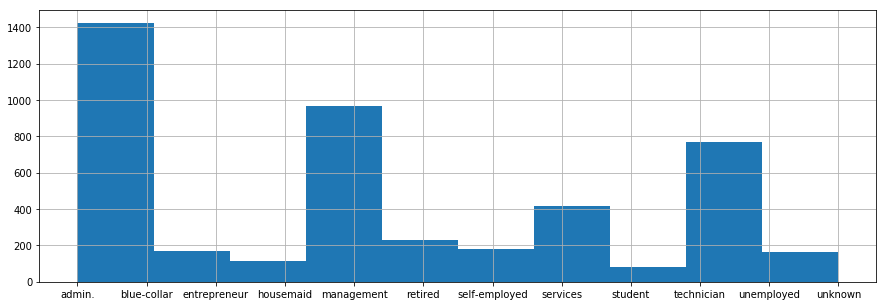

In [512]:
data.job.hist(figsize=(15,5) )

In [513]:
data.job.value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

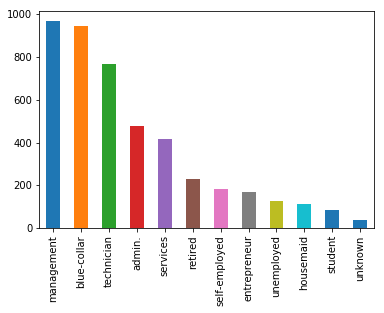

In [514]:
data.job.value_counts().plot(kind='bar')

In [515]:
data[data.job == "unknown"].shape

(38, 17)

In [516]:
data.job.value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [517]:
data.job.unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [518]:
data.job.nunique()

12

- most popular traget clients are in managment and blue-collar jobs
- 38 clients have unknown jobs
- 84 clients are students

In [519]:
data.columns

Index([u'age', u'job', u'marital', u'education', u'default', u'balance',
       u'housing', u'loan', u'contact', u'day', u'month', u'duration',
       u'campaign', u'pdays', u'previous', u'poutcome', u'y'],
      dtype='object')

# marital

In [520]:
data.marital.nunique()

3

In [521]:
data.marital.value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

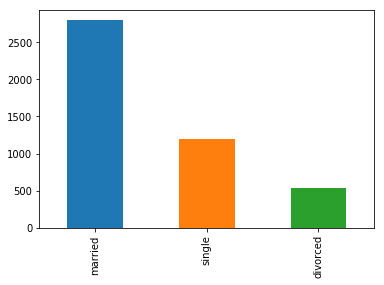

In [522]:
data.marital.value_counts().plot(kind="bar")

   - most of the contacted clients are married 
  

In [523]:
data.columns

Index([u'age', u'job', u'marital', u'education', u'default', u'balance',
       u'housing', u'loan', u'contact', u'day', u'month', u'duration',
       u'campaign', u'pdays', u'previous', u'poutcome', u'y'],
      dtype='object')

   # education

In [524]:
data.education.nunique()

4

In [525]:
data.education.value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

In [526]:
data.education.unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

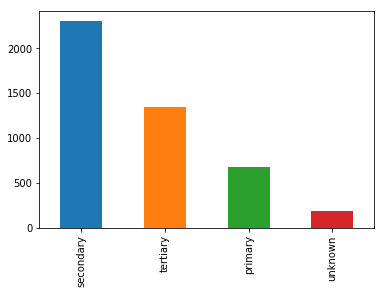

In [527]:
data.education.value_counts().plot(kind='bar')

- 187 clients have unknown education 
- most of occuring category of clients have secondary education 
   

   # default

In [528]:
data.default.unique()

array(['no', 'yes'], dtype=object)

In [529]:
data.default.nunique()

2

In [530]:
data.default.value_counts()

no     4445
yes      76
Name: default, dtype: int64

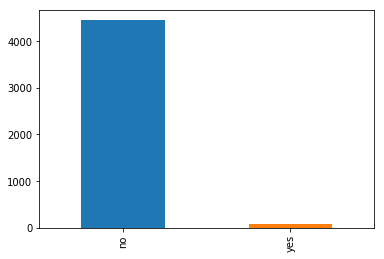

In [531]:
data.default.value_counts().plot(kind="bar")

   - most of our clients have no credits defaults
     
   

   # Balance

In [532]:
data.balance.nunique()

2353

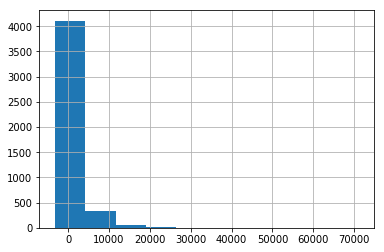

In [533]:
data.balance.hist()

- most clients have  a yearly balance between (0 , 5000)
 

In [534]:
data["target"]=data.y

In [535]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,target
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,no


In [536]:
data.shape

(4521, 18)

In [537]:
data.drop("y" , axis =1 , inplace=True)

In [538]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [539]:
data.shape

(4521, 17)

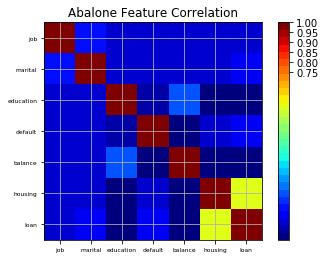

In [540]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Abalone Feature Correlation')
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()
    
correlation_matrix(data)

In [541]:
data.columns

Index([u'age', u'job', u'marital', u'education', u'default', u'balance',
       u'housing', u'loan', u'contact', u'day', u'month', u'duration',
       u'campaign', u'pdays', u'previous', u'poutcome', u'target'],
      dtype='object')

# housing

In [542]:
data.housing.nunique()

2

In [543]:
data.housing.value_counts()

yes    2559
no     1962
Name: housing, dtype: int64

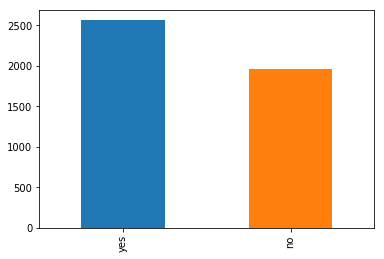

In [544]:
data.housing.value_counts().plot(kind="bar")

# loan

In [545]:
data.loan.nunique()

2

In [546]:
data.loan.value_counts()

no     3830
yes     691
Name: loan, dtype: int64

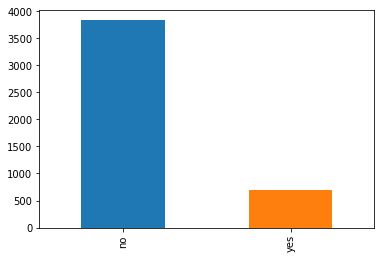

In [547]:
data.loan.value_counts().plot(kind="bar")

In [548]:
data.columns

Index([u'age', u'job', u'marital', u'education', u'default', u'balance',
       u'housing', u'loan', u'contact', u'day', u'month', u'duration',
       u'campaign', u'pdays', u'previous', u'poutcome', u'target'],
      dtype='object')

# contact

In [549]:
data.contact.nunique()

3

In [550]:
data.contact.value_counts()

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

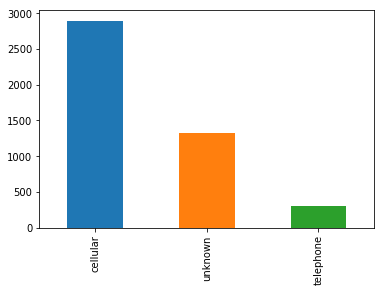

In [551]:
data.contact.value_counts().plot(kind="bar")

# day

In [552]:
data.day.nunique()

31

In [553]:
data.day.value_counts()

20    257
18    226
19    201
21    198
14    195
17    191
7     190
6     187
28    181
5     181
8     180
29    175
15    174
30    168
13    166
16    164
9     163
11    152
12    151
4     139
2     114
27    113
26    110
3     105
23    102
22     86
25     80
31     59
10     50
24     36
1      27
Name: day, dtype: int64

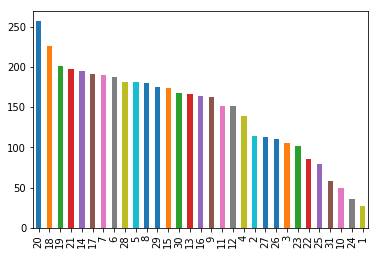

In [554]:
data.day.value_counts().plot(kind="bar")

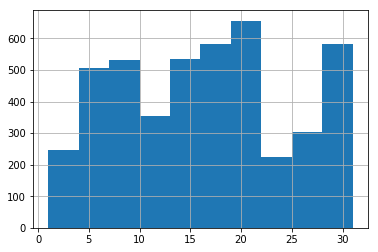

In [555]:
data.day.hist()

# month

In [556]:
data.month.nunique()

12

In [557]:
data.month.value_counts()

may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64

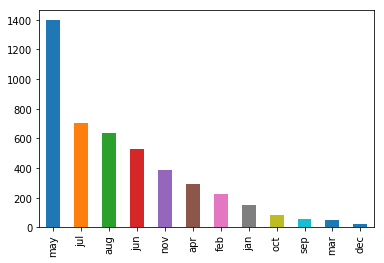

In [558]:
data.month.value_counts().plot(kind="bar")

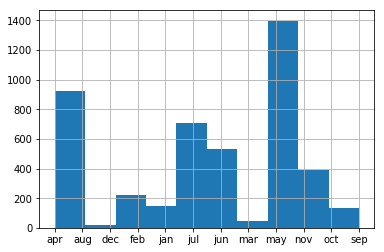

In [559]:
data.month.hist()

# duration

In [560]:
data.duration.nunique()

875

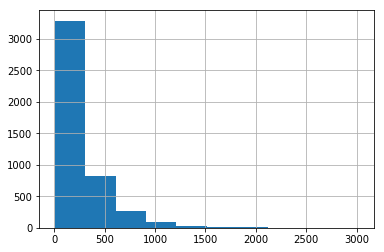

In [561]:
data.duration.hist()

- most calls are between 0 to 250 sec ( 4 min)

In [562]:
data.columns

Index([u'age', u'job', u'marital', u'education', u'default', u'balance',
       u'housing', u'loan', u'contact', u'day', u'month', u'duration',
       u'campaign', u'pdays', u'previous', u'poutcome', u'target'],
      dtype='object')

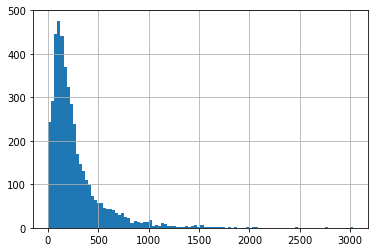

In [563]:
data.duration.hist(bins=100)

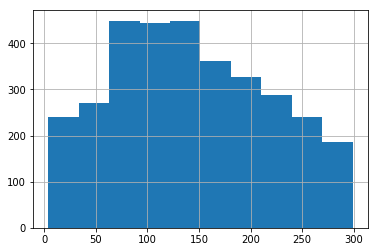

In [564]:
data[data.duration <300].duration.hist()

# campaign

In [565]:
data.campaign.nunique ()

32

In [566]:
data.campaign.value_counts()

1     1734
2     1264
3      558
4      325
5      167
6      155
7       75
8       56
9       30
10      27
11      22
12      21
13      17
14      10
15       9
16       8
17       7
18       7
25       4
28       3
24       3
20       3
19       3
21       2
23       2
22       2
32       2
29       1
44       1
30       1
50       1
31       1
Name: campaign, dtype: int64

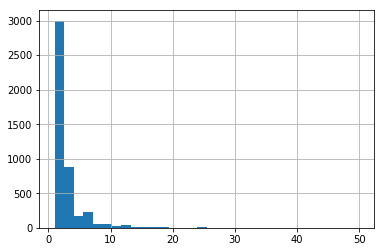

In [567]:
data.campaign.hist(bins=32)

# pdays

In [568]:
data.pdays.nunique()

292

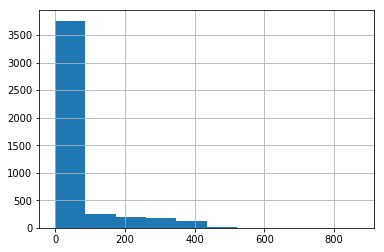

In [569]:
data.pdays.hist()

In [570]:
data[data.pdays == -1].shape

(3705, 17)

In [571]:
data.columns

Index([u'age', u'job', u'marital', u'education', u'default', u'balance',
       u'housing', u'loan', u'contact', u'day', u'month', u'duration',
       u'campaign', u'pdays', u'previous', u'poutcome', u'target'],
      dtype='object')

 # target

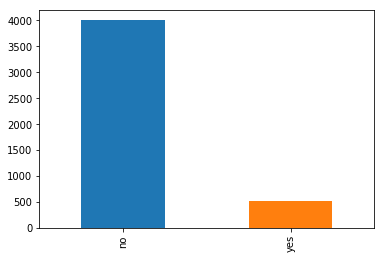

In [572]:
data.target.value_counts().plot(kind="bar")

In [573]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [574]:
data['is_new']=data.pdays

In [575]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target,is_new
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,-1
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,339
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,330
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,-1
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,-1


In [576]:
def set_client(x):
    if (x==-1):
          return 1 
    return 0

In [577]:
data.is_new = data.is_new.apply(set_client)

In [578]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target,is_new
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,1
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,1
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,1


In [579]:
def set_job(x):
     if x == "unknown" :  
            return 0 
     return 1

In [580]:
data["is_job"]= data.job.apply(set_job)

In [581]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target,is_new,is_job
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,1,1
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,0,1
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,0,1
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,1,1
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,1,1
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no,0,1
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no,0,1
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no,1,1
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no,1,1
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no,0,1


In [582]:
data[data.job =="unknown"].head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target,is_new,is_job
95,41,unknown,single,tertiary,no,1567,no,no,cellular,1,jul,291,2,-1,0,unknown,no,1,0
178,37,unknown,married,unknown,no,1699,no,no,unknown,9,jun,63,1,-1,0,unknown,no,1,0
230,52,unknown,married,secondary,no,142,no,no,cellular,25,aug,112,6,-1,0,unknown,no,1,0
641,56,unknown,married,unknown,no,0,no,no,unknown,20,jun,471,2,-1,0,unknown,no,1,0
779,55,unknown,married,primary,no,159,no,no,unknown,4,sep,15,1,-1,0,unknown,no,1,0


In [583]:
data.job.replace("unknown","manegement", inplace=True)

In [584]:
data[data.job=="unknown"].shape

(0, 19)

In [585]:
data.job.mode()

0    management
dtype: object

In [586]:
data.job.mode()[0]

'management'

In [587]:
data.age.replace("NA", data.age.mean())

0       30
1       33
2       35
3       30
4       59
5       35
6       36
7       39
8       41
9       43
10      39
11      43
12      36
13      20
14      31
15      40
16      56
17      37
18      25
19      31
20      38
21      42
22      44
23      44
24      26
25      41
26      55
27      67
28      56
29      53
        ..
4491    35
4492    32
4493    28
4494    26
4495    48
4496    30
4497    31
4498    31
4499    45
4500    38
4501    34
4502    42
4503    60
4504    42
4505    32
4506    42
4507    33
4508    42
4509    51
4510    36
4511    46
4512    40
4513    49
4514    38
4515    32
4516    33
4517    57
4518    57
4519    28
4520    44
Name: age, Length: 4521, dtype: int64

In [588]:
data.age.mean()

41.17009511170095

In [589]:
data.age.isnull().sum()

0

In [590]:
data.age.fillna(data.age.mean(),inplace=True)

In [591]:
for feature in data.columns:
     print feature + "  " +str(data[feature].isnull().sum())

age  0
job  0
marital  0
education  0
default  0
balance  0
housing  0
loan  0
contact  0
day  0
month  0
duration  0
campaign  0
pdays  0
previous  0
poutcome  0
target  0
is_new  0
is_job  0


In [592]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target,is_new,is_job
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,1,1
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,0,1
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,0,1
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,1,1
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,1,1


In [593]:
def set_0_1(x):
    if x =="yes":
        return 1 
    return 0

In [594]:
data.loan = data.loan.apply(set_0_1)

In [595]:
data.default = data.default.apply(set_0_1)

In [596]:
data.housing = data.housing.apply(set_0_1)

In [597]:
data.target = data.target.apply(set_0_1)

In [598]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target,is_new,is_job
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0,1,1
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0,0,1
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0,0,1
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0,1,1
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0,1,1


In [599]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 19 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null int64
balance      4521 non-null int64
housing      4521 non-null int64
loan         4521 non-null int64
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
target       4521 non-null int64
is_new       4521 non-null int64
is_job       4521 non-null int64
dtypes: int64(13), object(6)
memory usage: 671.2+ KB


In [600]:
data[data.is_new == 1].poutcome.value_counts()

unknown    3705
Name: poutcome, dtype: int64

In [601]:
data[data.is_new == 0].poutcome.value_counts()

failure    490
other      197
success    129
Name: poutcome, dtype: int64

In [602]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target,is_new,is_job
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0,1,1
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0,0,1
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0,0,1
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0,1,1
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0,1,1


In [603]:
def set_poutcome(x):
    if x =="unknown":
        return 0 
    if x =="failure":
        return 1
    if x == "sucess":
        return 2 
    return 3

In [604]:
data.poutcome = data.poutcome.apply(set_poutcome)

In [605]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target,is_new,is_job
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,0,0,1,1
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,1,0,0,1
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,1,0,0,1
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,0,0,1,1
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,0,0,1,1


In [606]:
from sklearn.preprocessing import LabelEncoder

In [607]:
lb = LabelEncoder()

In [608]:
data.month = lb.fit_transform(data.month)

In [609]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target,is_new,is_job
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,10,79,1,-1,0,0,0,1,1
1,33,services,married,secondary,0,4789,1,1,cellular,11,8,220,1,339,4,1,0,0,1
2,35,management,single,tertiary,0,1350,1,0,cellular,16,0,185,1,330,1,1,0,0,1
3,30,management,married,tertiary,0,1476,1,1,unknown,3,6,199,4,-1,0,0,0,1,1
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,8,226,1,-1,0,0,0,1,1


In [610]:
object_features =[]
for feature in data.columns:
    if data[feature].dtype == object :
        object_features.append(feature)
    

In [611]:
object_features

['job', 'marital', 'education', 'contact']

In [612]:
for feature in object_features : 
    data[feature]= lb.fit_transform(data[feature])

In [613]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target,is_new,is_job
0,30,11,1,0,0,1787,0,0,0,19,10,79,1,-1,0,0,0,1,1
1,33,8,1,1,0,4789,1,1,0,11,8,220,1,339,4,1,0,0,1
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,1,0,0,1
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,0,0,1,1
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,0,0,1,1


   # Training

## decision tree

In [614]:
from sklearn.tree import DecisionTreeClassifier

In [615]:
tree = DecisionTreeClassifier()

In [616]:
target = data.pop("target")

In [617]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,is_new,is_job
0,30,11,1,0,0,1787,0,0,0,19,10,79,1,-1,0,0,1,1
1,33,8,1,1,0,4789,1,1,0,11,8,220,1,339,4,1,0,1
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,1,0,1
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,0,1,1
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,0,1,1


In [618]:
tree.fit(data , target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [619]:
pred = tree.predict(data)

In [620]:
from sklearn.metrics import accuracy_score

In [621]:
accuracy_score(target, pred)

1.0

In [622]:
data.shape

(4521, 18)

In [623]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,is_new,is_job
0,30,11,1,0,0,1787,0,0,0,19,10,79,1,-1,0,0,1,1
1,33,8,1,1,0,4789,1,1,0,11,8,220,1,339,4,1,0,1
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,1,0,1
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,0,1,1
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,0,1,1


In [624]:
limit = int(4521 * 0.8)

In [625]:
train = data.iloc[0:limit,:]
test = data.iloc[limit:,:]

In [626]:
print(train.shape,test.shape)

((3616, 18), (905, 18))


In [627]:
train_y= target[0:limit]
test_y = target[limit:]

In [628]:
print ( train_y.shape, test_y.shape)

((3616L,), (905L,))


In [629]:
tree.fit(train, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [630]:
pred = tree.predict(test)

In [631]:
accuracy_score(pred , test_y)

0.8662983425414365

In [632]:
sample = test.iloc[0]

In [633]:
#sample

In [634]:
sample.shape

(18L,)

In [635]:
pred_sample = tree.predict(sample.values.reshape(1,-1))

In [636]:
pred_sample

array([0], dtype=int64)

In [637]:
proba = tree.predict_proba(sample.values.reshape(1,-1))

In [638]:
proba

array([[1., 0.]])

In [639]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(test_y , pred)
conf

array([[742,  52],
       [ 69,  42]], dtype=int64)

In [640]:
y_true = pd.Series(test_y .tolist())
y_pred = pd.Series(pred.tolist())
print ( y_true.shape , y_pred.shape)
pd.crosstab(y_true,
           y_pred,
           rownames=["true"],
           colnames=["predicted"],
           margins=True
           )

((905L,), (905L,))


predicted,0,1,All
true,,,
0,742,52,794
1,69,42,111
All,811,94,905


# 2 knn

In [641]:
from sklearn.neighbors import KNeighborsClassifier

In [642]:
knn = KNeighborsClassifier(n_jobs=-1 , n_neighbors=5)

In [643]:
knn.fit(train, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

In [644]:
pred = knn.predict(test)

In [645]:
accuracy_score(test_y,pred)

0.8596685082872928

In [646]:
y_true = pd.Series(test_y .tolist())
y_pred = pd.Series(pred.tolist())
print ( y_true.shape , y_pred.shape)
pd.crosstab(y_true,
           y_pred,
           rownames=["true"],
           colnames=["predicted"],
           margins=True
           )

((905L,), (905L,))


predicted,0,1,All
true,,,
0,756,38,794
1,89,22,111
All,845,60,905


# svc

In [647]:
from sklearn.svm import SVC

In [648]:
svc =SVC()

In [649]:
svc.fit(train , train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [650]:
pred =svc.predict(test)

In [651]:
accuracy_score(test_y,pred)

0.8773480662983425

In [652]:
y_true = pd.Series(test_y .tolist())
y_pred = pd.Series(pred.tolist())
print ( y_true.shape , y_pred.shape)
pd.crosstab(y_true,
           y_pred,
           rownames=["true"],
           colnames=["predicted"],
           margins=True
           )

((905L,), (905L,))


predicted,0,All
true,,
0,794,794
1,111,111
All,905,905


  # 4 Randomforestregressor

In [653]:
from sklearn.ensemble import RandomForestClassifier

In [654]:
rf = RandomForestClassifier(random_state=42,
                            n_estimators=200, 
                            n_jobs=-1)

In [655]:
rf.fit(train, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [656]:
pred = rf.predict(test)

In [657]:
accuracy_score(test_y,pred)

0.8961325966850828

In [658]:
y_true = pd.Series(test_y .tolist())
y_pred = pd.Series(pred.tolist())
print ( y_true.shape , y_pred.shape)
pd.crosstab(y_true,
           y_pred,
           rownames=["true"],
           colnames=["predicted"],
           margins=True
           )

((905L,), (905L,))


predicted,0,1,All
true,,,
0,780,14,794
1,80,31,111
All,860,45,905


In [659]:
from sklearn.ensemble import ExtraTreesClassifier

In [660]:
ext = ExtraTreesClassifier(n_estimators=500, n_jobs=-1)

In [661]:
ext.fit(train, train_y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [662]:
pred = ext.predict(test)

In [663]:
accuracy_score(test_y,pred)

0.8895027624309392

In [664]:
y_true = pd.Series(test_y .tolist())
y_pred = pd.Series(pred.tolist())
print ( y_true.shape , y_pred.shape)
pd.crosstab(y_true,
           y_pred,
           rownames=["true"],
           colnames=["predicted"],
           margins=True
           )

((905L,), (905L,))


predicted,0,1,All
true,,,
0,781,13,794
1,87,24,111
All,868,37,905


In [665]:
from sklearn.ensemble import GradientBoostingClassifier

In [666]:
gb = GradientBoostingClassifier()

In [667]:
gb.fit(train , train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [668]:
pred = gb.predict(test)

In [669]:
accuracy_score(test_y,pred)

0.8961325966850828

In [670]:
y_true = pd.Series(test_y .tolist())
y_pred = pd.Series(pred.tolist())
print ( y_true.shape , y_pred.shape)
pd.crosstab(y_true,
           y_pred,
           rownames=["true"],
           colnames=["predicted"],
           margins=True
           )

((905L,), (905L,))


predicted,0,1,All
true,,,
0,775,19,794
1,75,36,111
All,850,55,905


In [671]:
import graphviz

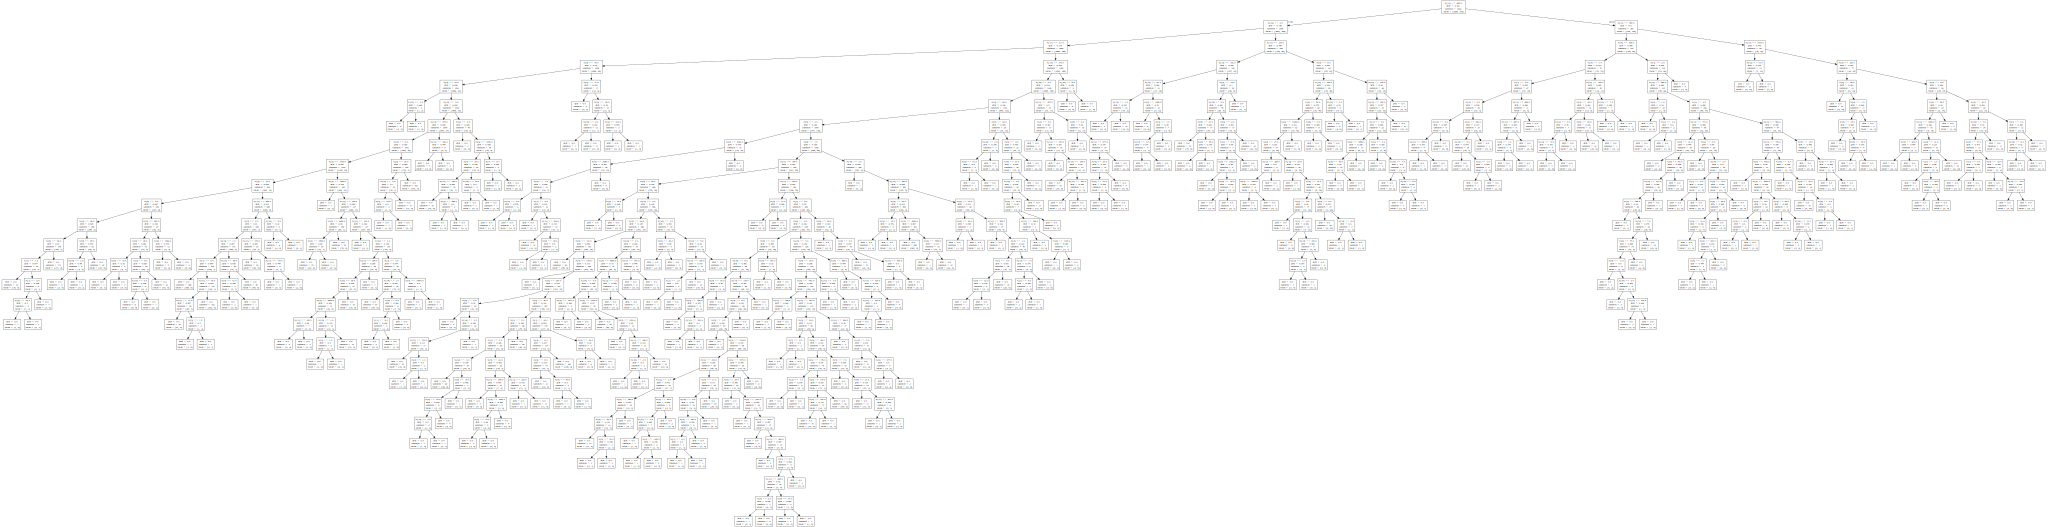

In [672]:
from sklearn import tree
clf =tree.DecisionTreeClassifier()
clf = clf.fit(train, train_y)

import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("tree")
graph

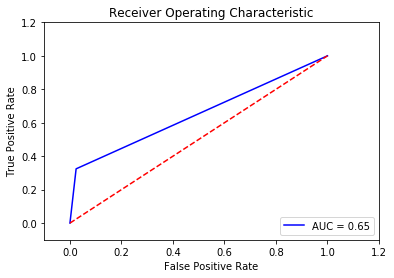

In [674]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random

false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()